In [1]:
import pandas as pd
from music21 import *  #Importar todas las funciones de music21
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'  #Ruta de musescore
us['directoryScratch'] = '/tmp'

/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.0.4) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [15]:
class cuartas:

    """
    Clase para trabajar con partituras  y obtener información de las mismas

    """

    

    def __init__(self, archivo):
        
        """
        Constructor de la clase
        :param archivo: archivo xml de la partitura
        
        Se debe tener importado 'Pandas' y 'music21'

        """

        self.archivo = archivo  #Path de la partitura
        self.s = converter.parse(archivo) #Lectura del archivo

        #Listas para guardar la info de la partitura
        self.acordes = []
        self.beats = []
        self.notas = []
        self.intervalos = []
        self.compas = []
        self.division = []
        self.tipo_div = []

    def mostrar_partitura(self):
        
        """
        Método para mostrar la partitura
        """
        self.s.show()


    def chordify(self):
        
        """
        Método para realizar chordify a toda la partitura,
        juntar todas las notas que suenan simultaneamente

        """

        self.s = self.s.chordify()
        return self.s
    
    def asignar_intervalos(self):
        
        """

        Método para asignar los intervalos dentro de la partitura

        """

        for c in self.s.recurse().getElementsByClass('Chord'):
            #Esta opción es para que quedén en la misma octava 
            # c.closedPosition(forceOctave=4, inPlace=True) 
            c.annotateIntervals(inPlace=True)

    def mostrar_intervalos(self):

        """ 
        Método para mostar en pantalla los acordes y sus intervalos

        """
        for c in self.s.recurse().getElementsByClass('Chord'):
            print(c, end=" ")
            for l in c.lyrics:
                print(l.text, end=" ")
            print()

    def extraer_acordes(self):

        """
        Método que guarda todos los acordes de la partitura en el 
        atributo 'acordes'.
        """
        
        for c in self.s.recurse().getElementsByClass('Chord'):
            self.acordes.append(c)
        return self.acordes
    

    #Método que no sirvió xd
    # def extraer_intervalos(self):
    #     self.intervalos = []
    #     for c in self.extraer_acordes():
    
    #         for l in c.lyrics:
    #             self.intervalos.append(int(l.text))

    #     return self.intervalos   
    
    def extraer_df(self):

        """

        Método para extraer un dataframe con la información de la partitura
        :return: dataframe con la información de la partitura

        ¡¡IMPORTANTE!!:

        El método de 'extraer_df' dentro llama a los métodos 'chordify', 
        'asignar_intervalos' y 'extraer_acordes' para obtener la información de la partitura.
        No es necesario llamar a estos métodos de forma individual, ya que el método 'extraer_df'
        los llama internamente.
        
        """

        #Métodos que dan la info que necesita de la partitura
        self.chordify()
        self.asignar_intervalos()
        self.extraer_acordes()
        acordes = self.acordes


        for i in acordes:
            # self.notas.append(i.name + str(i.octave))  #Nombre de las notas
            self.notas.append([ j.name + str(j.octave)    for j in i.notes])
            self.beats.append(i.beat)        #Beat (pulso) del compás en el que está el acorde
            self.intervalos.append([int(l.text) for l in i.lyrics]) #Intervalos de las nota del acorde
            self.compas.append(i.measureNumber) #Número de compás
            self.division.append(i.duration.quarterLength) #Division
            self.tipo_div.append(i.duration.type)

        self.df = pd.DataFrame({'Notas':self.notas, 'Intervalos':self.intervalos, 'Beat':self.beats,
                                'Compás':self.compas, 'Duración':self.division, 'Tipo':self.tipo_div})
        
        return self.df
    
    



In [16]:
path_midi1 =  '/home/cuba/Documents/UNIVERSIDAD/M_C/Archivos/MIDI1.xml'

midi1 = cuartas(path_midi1)
midi1.extraer_df()

,Notas,Intervalos,Beat,Compás,Duración,Tipo
0,"[C3, C4, G4, E5]","[8, 5, 3]",1.0,1,4.0,whole
1,"[D3, B3, G4, D5]","[8, 6, 4]",1.0,2,4.0,whole
2,"[E3, C4, G4, C5]","[6, 6, 3]",1.0,3,4.0,whole
3,"[F3, D4, F4, B4]","[8, 6, 4]",1.0,4,4.0,whole
4,"[E3, E4, G4, C5]","[8, 6, 3]",1.0,5,4.0,whole
5,"[G3, E4, G4, C5]","[8, 6, 4]",1.0,6,2.0,half
6,"[G3, D4, G4, B4]","[8, 5, 3]",3.0,6,2.0,half
7,"[C3, E4, G4, C5]","[8, 5, 3]",1.0,7,4.0,whole
8,"[C3, F4, A4, C5]","[8, 6, 4]",1.0,8,4.0,whole
9,"[C3, E4, G4, C5]","[8, 5, 3]",1.0,9,4.0,whole


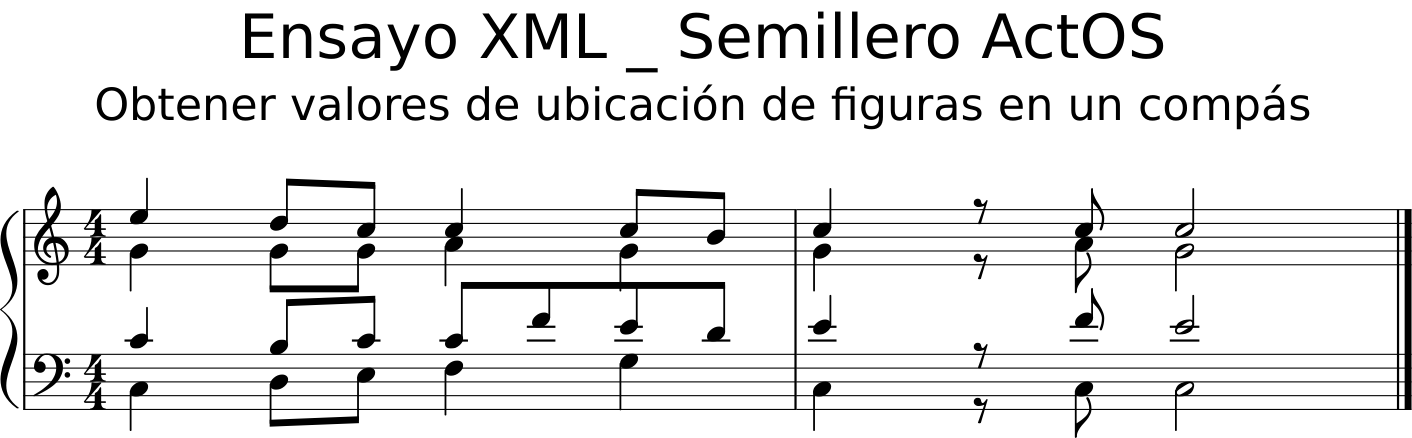

In [17]:
tiempos_path = '/home/cuba/Documents/UNIVERSIDAD/M_C/Archivos/Ensayo_XML_UbicacionTiempos.musicxml'

tiempos = cuartas(tiempos_path)
tiempos.mostrar_partitura()


In [18]:
tiempos.extraer_df()

,Notas,Intervalos,Beat,Compás,Duración,Tipo
0,"[C3, C4, G4, E5]","[8, 5, 3]",1.0,1,1.0,quarter
1,"[D3, B3, G4, D5]","[8, 6, 4]",2.0,1,0.5,eighth
2,"[E3, C4, G4, C5]","[6, 6, 3]",2.5,1,0.5,eighth
3,"[F3, C4, A4, C5]","[5, 5, 3]",3.0,1,0.5,eighth
4,"[F3, F4, A4, C5]","[8, 5, 3]",3.5,1,0.5,eighth
5,"[G3, E4, G4, C5]","[8, 6, 4]",4.0,1,0.5,eighth
6,"[G3, D4, G4, B4]","[8, 5, 3]",4.5,1,0.5,eighth
7,"[C3, E4, G4, C5]","[8, 5, 3]",1.0,2,1.0,quarter
8,"[C3, F4, A4, C5]","[8, 6, 4]",2.5,2,0.5,eighth
9,"[C3, E4, G4, C5]","[8, 5, 3]",3.0,2,2.0,half


In [19]:
#Ejemplo tresillos

tresillos_path = '/home/cuba/Documents/UNIVERSIDAD/M_C/Archivos/Ensayo_XML_UbicacionTiemposTresillos.musicxml'
tresillos = cuartas(tresillos_path)
tresillos.extraer_df()

,Notas,Intervalos,Beat,Compás,Duración,Tipo
0,"[C3, G3, E4, C5]","[8, 5, 3]",1.0,1,1.0,quarter
1,"[E3, G3, C4, C5]","[6, 6, 3]",2.0,1,1.0,quarter
2,"[F3, A3, D4, C5]","[6, 5, 3]",3.0,1,1/3,eighth
3,"[E3, A3, E4, C5]","[8, 6, 4]",10/3,1,1/3,eighth
4,"[D3, A3, F4, C5]","[7, 5, 3]",11/3,1,1/3,eighth
5,"[G2, G3, F4, B4]","[8, 7, 3]",4.0,1,1.0,quarter
6,"[C3, G3, E4, C5]","[8, 5, 3]",1.0,2,2/3,quarter
7,"[D3, G3, D4, B4]","[8, 6, 4]",5/3,2,2/3,quarter
8,"[E3, G3, C4, C5]","[6, 6, 3]",7/3,2,2/3,quarter
9,"[C3, G3, E4, C5]","[8, 5, 3]",3.0,2,2.0,half


In [20]:
#Ejemplo compás ternario

compas_ternario_path = '/home/cuba/Documents/UNIVERSIDAD/M_C/Archivos/Ensayo_XML_UbicacionTiemposCompasTernario.musicxml'
compas_ternario = cuartas(compas_ternario_path)
compas_ternario.extraer_df()


,Notas,Intervalos,Beat,Compás,Duración,Tipo
0,"[C3, C4, G4, E5]","[8, 5, 3]",1.0,1,1.0,quarter
1,"[D3, B3, G4, D5]","[8, 6, 4]",2.0,1,0.5,eighth
2,"[E3, C4, G4, C5]","[6, 6, 3]",2.5,1,0.5,eighth
3,"[F3, C4, A4, C5]","[5, 5, 3]",3.0,1,0.5,eighth
4,"[F3, F4, A4, C5]","[8, 5, 3]",3.5,1,0.5,eighth
5,"[G3, E4, G4, C5]","[8, 6, 4]",1.0,2,0.5,eighth
6,"[G3, D4, G4, B4]","[8, 5, 3]",1.5,2,0.5,eighth
7,"[C3, E4, G4, C5]","[8, 5, 3]",2.0,2,1.0,quarter
8,"[C3, F4, A4, C5]","[8, 6, 4]",3.5,2,0.5,eighth
9,"[C3, E4, G4, C5]","[8, 5, 3]",1.0,3,2.0,half


In [21]:
#Ejemplo coral Bach
bach_path = '/home/cuba/Documents/UNIVERSIDAD/M_C/Archivos/028600B_.xml'
bach = cuartas(bach_path)
df = bach.extraer_df()

df

,Notas,Intervalos,Beat,Compás,Duración,Tipo
0,"[A2, C4, E4, A4]","[8, 5, 3]",4.00,0,1.00,quarter
1,"[A3, E4, A4, C5]","[8, 5, 3]",1.00,1,1.00,quarter
2,"[A3, E4, B4]","[5, 2]",2.00,1,0.50,eighth
3,"[G#3, E4, B4]","[6, 3]",2.50,1,0.50,eighth
4,"[A3, E4, B4, C5]","[5, 3, 2]",3.00,1,0.50,eighth
5,"[A2, E4, A4, C5]","[8, 5, 3]",3.50,1,0.50,eighth
6,"[B2, D4, A4, D5]","[7, 3, 3]",4.00,1,0.50,eighth
7,"[B2, D4, G4, D5]","[6, 3, 3]",4.50,1,0.50,eighth
8,"[C3, D4, G4, E5]","[5, 3, 2]",1.00,2,0.50,eighth
9,"[D3, C4, G4, E5]","[7, 4, 2]",1.50,2,0.25,16th


In [97]:
# df['Intervalos']


# contiene_patron = [any(lista[i:i+2] == [6, 4] for i in range(len(lista))) for lista in df.Intervalos]
# df_filtrado = df[contiene_patron]
# df_filtrado

In [24]:
#FUNCION
def CuartaseIntervalos(dataframe):
  nuevalista = dataframe['Intervalos']
  info_filas = []
  indices = []
  for indice, lista in enumerate(nuevalista):
    if 6 in lista and 4 in lista:
      #FILAS E INFORMACION
      fila = dataframe.iloc[indice]
      info_filas.append(fila)
      #INDICES PARA ACCEDER POR FUERA
      indice_fila = indice
      indices.append(indice_fila)

  return indices

In [98]:
lista_64 = CuartaseIntervalos(df)
lista_antes = [i-1  for i in lista_64]
lista_despues =   [i+1  for i in lista_64]

df_filtrado = df.iloc[lista_64]
df_antes = df.iloc[lista_antes]
df_despues = df.iloc[lista_despues]


In [124]:
df['Beat'].describe()

count    40.000000
mean      2.712500
std       1.130223
min       1.000000
25%       2.000000
50%       2.625000
75%       3.625000
max       4.500000
Name: Beat, dtype: float64

In [99]:
import matplotlib.pyplot as plt

In [103]:
df_filtrado

,Notas,Intervalos,Beat,Compás,Duración,Tipo
10,"[D3, B3, G4, E5]","[6, 4, 2]",1.75,2,0.25,16th
22,"[D3, G#3, E4, B4]","[6, 4, 2]",4.50,3,0.50,eighth
24,"[C3, A3, F#4, D5]","[6, 4, 2]",2.00,4,1.00,quarter
31,"[G3, E4, A4, C5]","[6, 4, 2]",2.50,5,0.50,eighth
34,"[E3, E4, A4, C5]","[8, 6, 4]",4.00,5,1.00,quarter


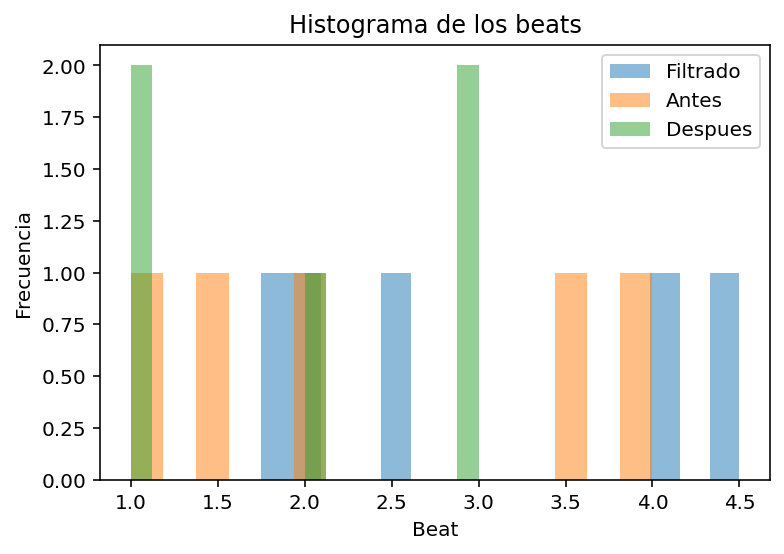

In [106]:
plt.hist(df_filtrado['Beat'], bins=16, label='Filtrado', alpha=0.5)
plt.hist(df_antes['Beat'], bins=16 , label='Antes', alpha=0.5)
plt.hist(df_despues['Beat'], bins=16, label='Despues', alpha=0.5)
plt.xlabel('Beat')
plt.ylabel('Frecuencia')
plt.title('Histograma de los beats')
plt.legend(loc='upper right')
plt.show()


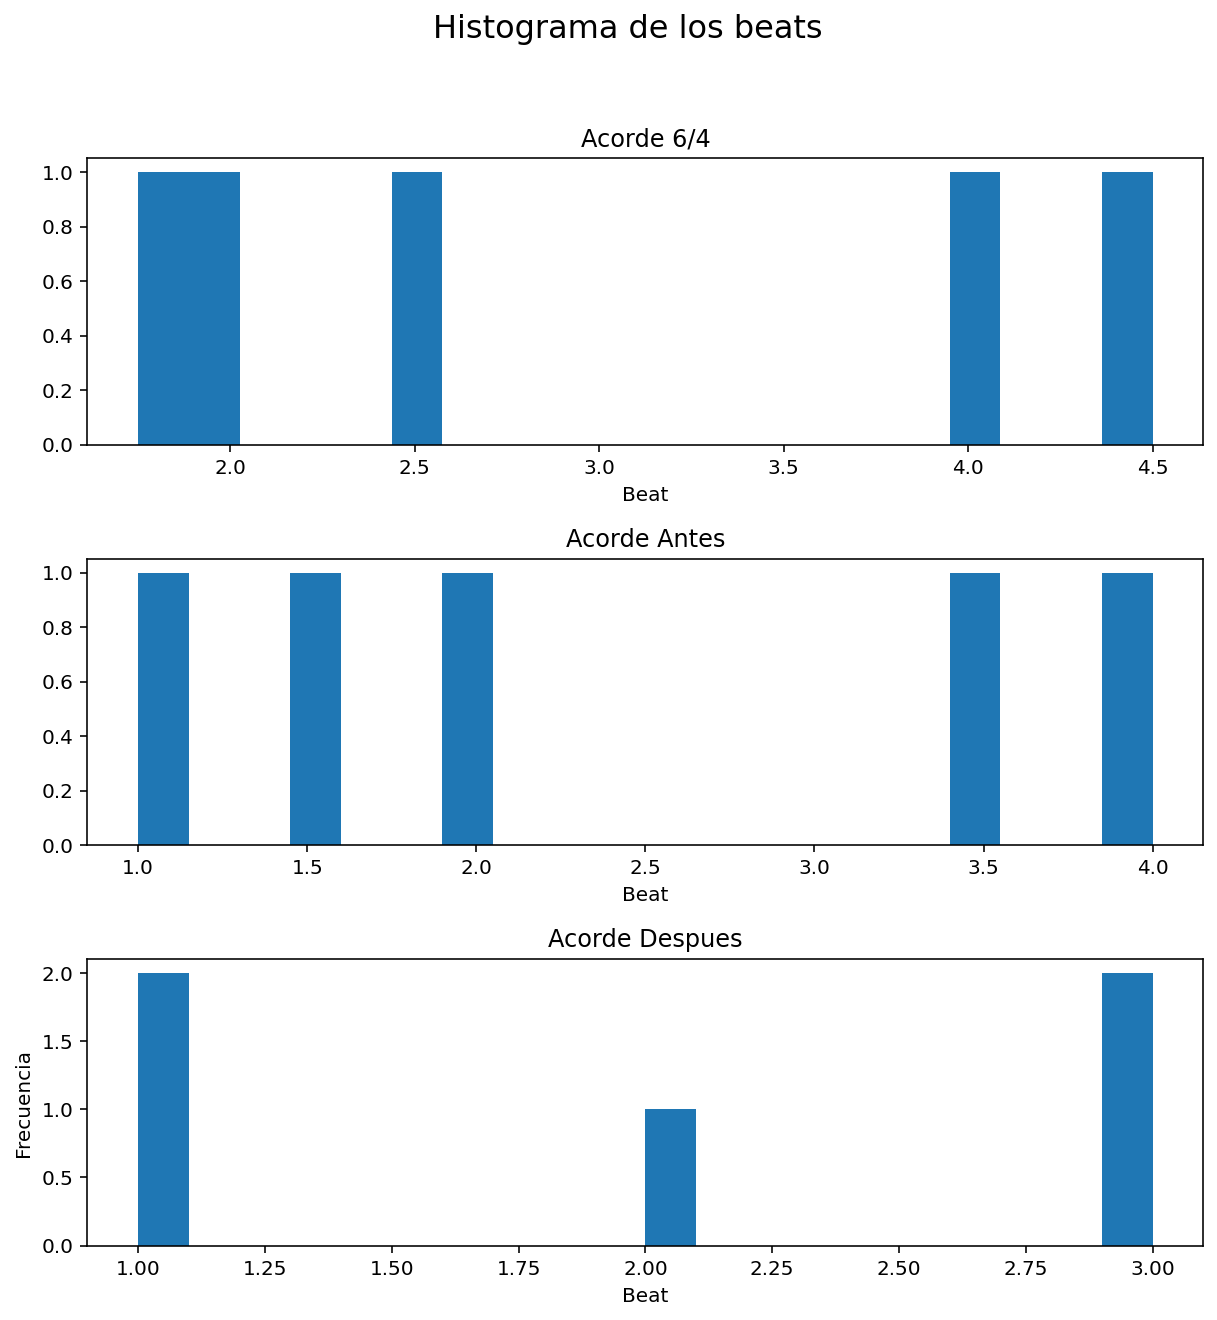

In [158]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
# Plot the first histogram
plt.subplot(3, 1, 1)  # Create the first subplot (3 rows, 1 column, first position)
plt.hist(df_filtrado['Beat'], bins=20, label='Filtrado')
plt.xlabel('Beat')  # Add x-axis label for clarity
# plt.xticks(np.arange(1, 5, .25))
plt.title('Acorde 6/4')  # Optional individual title

# Plot the second histogram
plt.subplot(3, 1, 2)  # Second subplot
plt.hist(df_antes['Beat'], bins=20, label='Antes')
plt.xlabel('Beat')  # Add x-axis label for clarity
plt.title('Acorde Antes')  # Optional individual title

# Plot the third histogram
plt.subplot(3, 1, 3)  # Third subplot
plt.hist(df_despues['Beat'], bins=20, label='Despues')
plt.xlabel('Beat')  # Add x-axis label for clarity
plt.title('Acorde Despues')  # Optional individual title

# Add overall title and y-axis label for the figure
plt.suptitle('Histograma de los beats', fontsize=16)
plt.subplots_adjust(hspace=0.4)  # Adjust spacing between subplots
plt.ylabel('Frecuencia')

plt.show()


In [160]:
df_filtrado

,Notas,Intervalos,Beat,Compás,Duración,Tipo
10,"[D3, B3, G4, E5]","[6, 4, 2]",1.75,2,0.25,16th
22,"[D3, G#3, E4, B4]","[6, 4, 2]",4.50,3,0.50,eighth
24,"[C3, A3, F#4, D5]","[6, 4, 2]",2.00,4,1.00,quarter
31,"[G3, E4, A4, C5]","[6, 4, 2]",2.50,5,0.50,eighth
34,"[E3, E4, A4, C5]","[8, 6, 4]",4.00,5,1.00,quarter


In [161]:
#Extraer nota del bajo de los acordes 

def extraer_bajo(dataframe):
    nuevalista = dataframe['Notas']
    bajos = []
    for lista in nuevalista:
        bajos.append(lista[0][0])

    return bajos

bajos = extraer_bajo(df_filtrado)
bajos

['D', 'D', 'C', 'G', 'E']

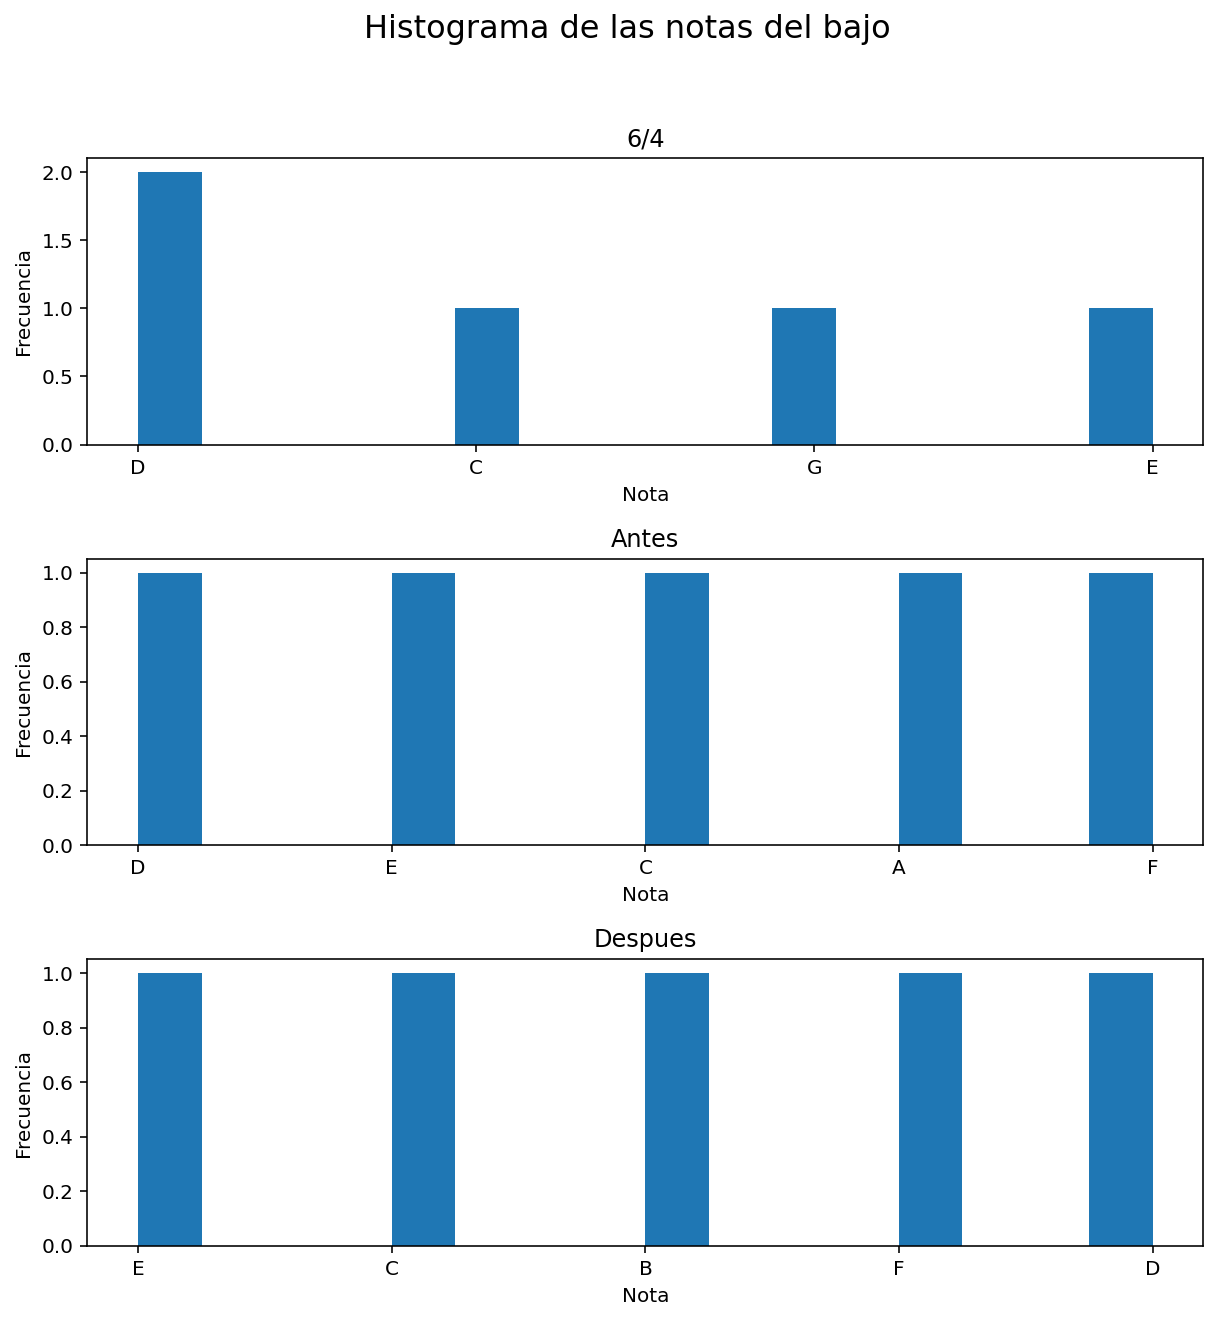

In [195]:
#Histograma de los bajos

fig, ax = plt.subplots(3,1 , figsize=(10, 10))
# Plot the first histogram
plt.subplot(3, 1, 1)  # Create the first subplot (3 rows, 1 column, first position)
plt.hist(bajos, bins=16, label='Filtrado')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.title('6/4')


bajos_antes = extraer_bajo(df_antes)
plt.subplot(3, 1, 2)  # Second subplot
plt.hist(bajos_antes, bins=16, label='Antes')
plt.xlabel('Nota')  # Add x-axis label for clarity
plt.ylabel('Frecuencia')
plt.title('Antes')

bajos_despues = extraer_bajo(df_despues)

plt.subplot(3, 1, 3)  # Third subplot
plt.hist(bajos_despues, bins=16, label='Despues')
plt.xlabel('Nota')  # Add x-axis label for clarity
plt.ylabel('Frecuencia')
plt.title('Despues')

plt.suptitle('Histograma de las notas del bajo', fontsize=16)
plt.subplots_adjust(hspace=0.4) 


plt.show()

In [168]:
bajos, bajos_antes, bajos_despues

(['D', 'D', 'C', 'G', 'E'],
 ['D', 'E', 'C', 'A', 'F'],
 ['E', 'C', 'B', 'F', 'D'])

In [173]:
def extraer_bajo_octava(dataframe):
    nuevalista = dataframe['Notas']
    bajos = []
    for lista in nuevalista:
        bajos.append(lista[0])

    return bajos

bajos_octava = extraer_bajo_octava(df_filtrado)
bajos_octava_antes = extraer_bajo_octava(df_antes)
bajos_octava_despues = extraer_bajo_octava(df_despues)


(['D3', 'D3', 'C3', 'G3', 'E3'],
 ['D3', 'E3', 'C3', 'A3', 'F3'],
 ['E3', 'C3', 'B2', 'F3', 'D3'])

In [190]:
#Definir los intervalos entre en bajo antes y el bajo 6/4

from music21 import *

intervalo_antes = []


for i in range(len(bajos_octava)):
    n1 = note.Note(bajos_octava_antes[i])
    n2 = note.Note(bajos_octava[i])
    intervalo_antes.append(interval.Interval(n1, n2))

antes_64 = [ i.niceName for i in intervalo_antes]
antes_64

['Perfect Unison',
 'Major Second',
 'Perfect Unison',
 'Major Second',
 'Minor Second']

In [189]:
#Definir los intervalos entre el bajo  6/4 y el bajo después
intervalo_despues = []

for i in range(len(bajos_octava)):
    n1 = note.Note(bajos_octava[i])
    n2 = note.Note(bajos_octava_despues[i])
    intervalo_despues.append(interval.Interval(n1, n2))

[ i.niceName for i in intervalo_despues]

['Major Second',
 'Major Second',
 'Minor Second',
 'Major Second',
 'Major Second']

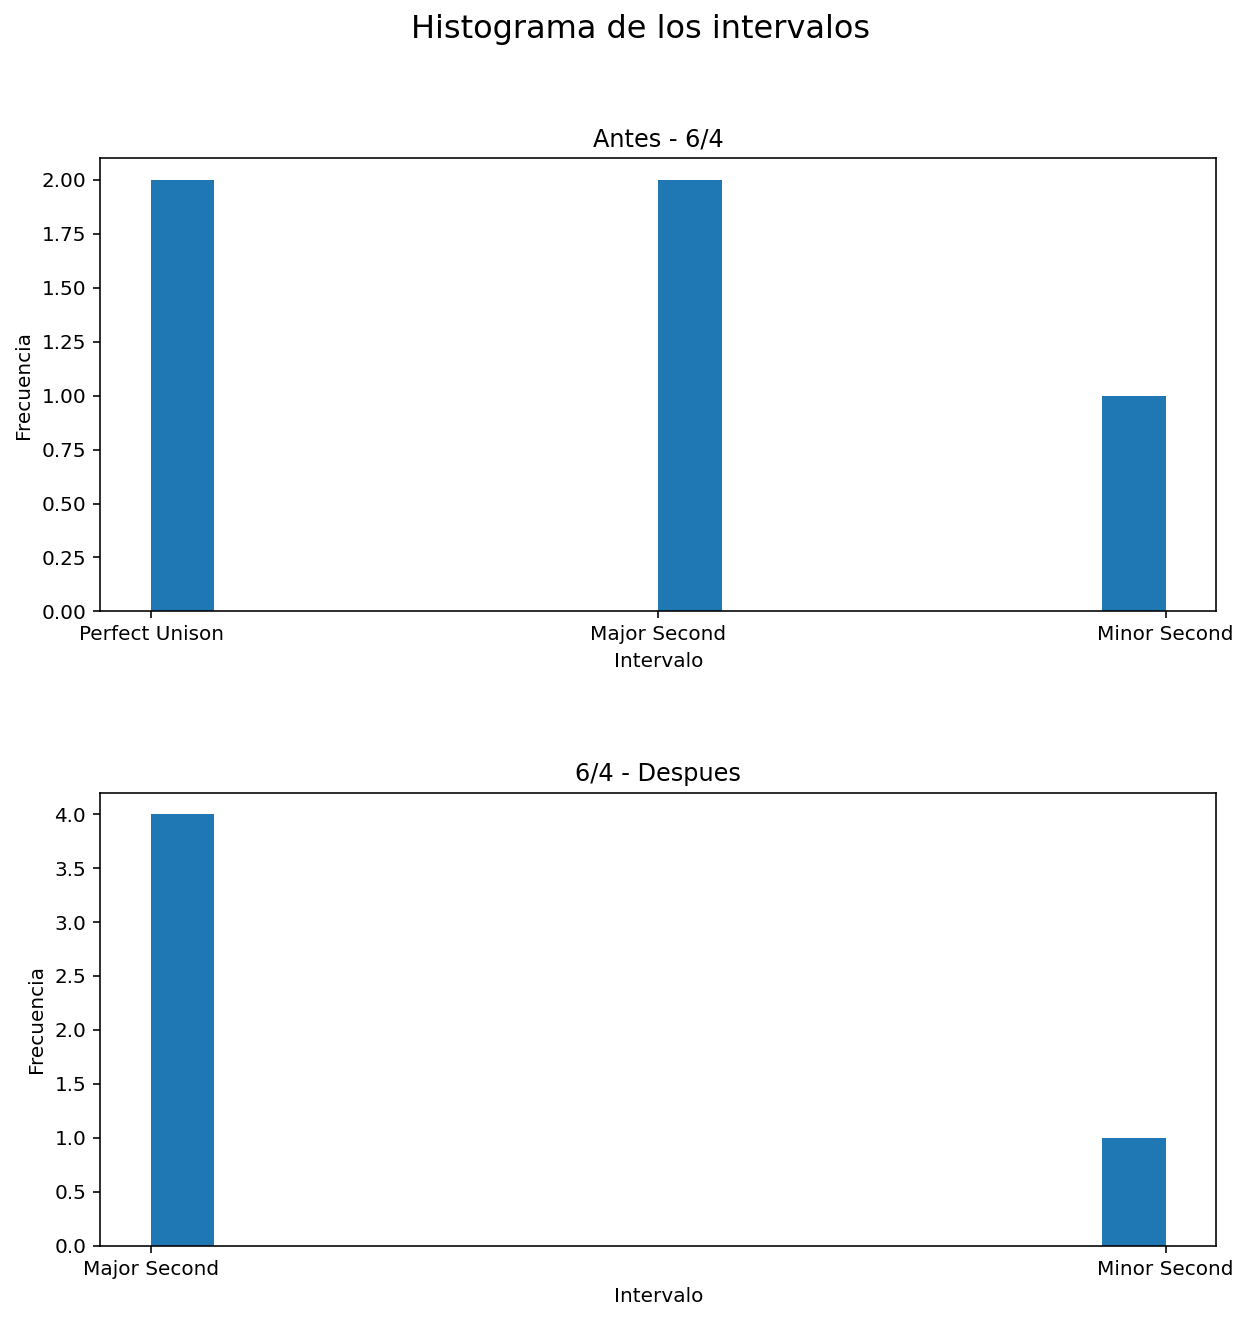

In [196]:
#Histograma de los intervalos entre los bajos 

fig, ax = plt.subplots(2,1 , figsize=(10, 10))
# Plot the first histogram
plt.subplot(2, 1, 1)  # Create the first subplot (3 rows, 1 column, first position)
plt.hist(antes_64, bins=16, label='Antes')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.title('Antes - 6/4')


despues_64 = [ i.niceName for i in intervalo_despues]
plt.subplot(2, 1, 2)  # Second subplot
plt.hist(despues_64, bins=16, label='Despues')
plt.xlabel('Intervalo')  # Add x-axis label for clarity
plt.ylabel('Frecuencia')
plt.title('6/4 - Despues')

plt.suptitle('Histograma de los intervalos', fontsize=16)
plt.subplots_adjust(hspace=0.4)
plt.show()